In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.model_selection import KFold, train_test_split
from math import sqrt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('cleanData_Final.csv')
X = dataset[['PrevAVGCost', 'PrevAssignedCost', 'AVGCost', 'LatestDateCost', 'A', 'B', 'C', 'D', 'E', 'F', 'G']]
y = dataset['GenPrice']

In [5]:
X

,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G
0,27.919192,33.0,28.545455,20.535354,1,0,0,0,0,0,0
1,57.333333,63.0,56.121212,61.838384,1,0,0,0,0,0,0
2,50.777778,54.0,45.131313,50.000000,1,0,0,0,0,0,0
3,45.747475,56.0,40.525253,38.080808,0,1,0,0,0,0,0
4,45.747475,56.0,40.525253,38.080808,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
24621,0.000000,60.0,0.000000,0.000000,0,0,0,0,0,0,1
24622,80.808081,96.0,0.000000,0.000000,0,0,0,0,0,0,1
24623,0.000000,23.0,25.131313,25.131313,0,0,0,0,0,0,1
24624,151.515152,201.0,181.818182,181.818182,0,0,0,0,0,0,1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes = (200, 200, 200, 200, 200), activation = 'relu', solver = 'adam', max_iter = 500,
                        learning_rate = 'adaptive')
regressor.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(200, 200, 200, 200, 200),
             learning_rate='adaptive', max_iter=500)

In [11]:
trainSet = pd.concat([X_train, y_train], axis = 1)
trainSet.head()

,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice
17651,12.049180,30.0,18.196721,22.967213,1,0,0,0,0,0,0,42.0
22606,124.793814,130.0,0.000000,0.000000,0,0,1,0,0,0,0,169.0
14124,28.343434,29.0,32.959596,40.949495,0,0,1,0,0,0,0,60.0
5777,21.506024,24.0,22.963855,29.000000,1,0,0,0,0,0,0,36.0
15500,12.557895,13.0,14.452632,16.463158,1,0,0,0,0,0,0,25.0


In [12]:
y_pred = regressor.predict(X_test)
y_pred

array([ 30.87359628, 101.41133104,  78.65409193, ...,  92.40585519,
        25.72595048,  39.4385839 ])

In [13]:
testSet = pd.concat([X_test, y_test], axis = 1)
testSet.head()

,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice
12301,18.919192,20.0,17.707071,17.757576,1,0,0,0,0,0,0,27.0
13317,62.808081,67.0,73.484848,74.656566,1,0,0,0,0,0,0,105.0
12320,0.000000,61.0,0.000000,0.000000,1,0,0,0,0,0,0,88.0
4013,107.747475,110.0,80.808081,80.808081,0,0,0,0,0,0,1,142.0
7807,40.606061,50.0,61.505051,66.222222,0,0,1,0,0,0,0,99.0


In [14]:
datasetPredict = pd.concat([testSet.reset_index(), pd.Series(y_pred, name = 'PredictedGenPrice')], axis =1).round(2)
datasetPredict.head(10)

,index,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice,PredictedGenPrice
0,12301,18.92,20.0,17.71,17.76,1,0,0,0,0,0,0,27.0,30.87
1,13317,62.81,67.0,73.48,74.66,1,0,0,0,0,0,0,105.0,101.41
2,12320,0.00,61.0,0.00,0.00,1,0,0,0,0,0,0,88.0,78.65
3,4013,107.75,110.0,80.81,80.81,0,0,0,0,0,0,1,142.0,123.14
4,7807,40.61,50.0,61.51,66.22,0,0,1,0,0,0,0,99.0,94.50
5,439,0.00,13.0,0.00,0.00,0,0,1,0,0,0,0,33.0,27.85
6,9995,33.55,33.0,33.18,33.94,0,0,0,0,0,0,1,54.0,50.95
7,14270,48.82,84.0,50.51,50.51,1,0,0,0,0,0,0,117.0,93.02
8,11358,15.15,15.0,15.15,15.15,0,0,1,0,0,0,0,30.0,32.87
9,8320,22.69,25.0,22.88,22.47,0,0,0,0,0,0,1,52.0,37.89


In [15]:
datasetPredict.corr()

,index,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice,PredictedGenPrice
index,1.000000,-0.005980,0.003228,-0.004309,0.006373,-0.018983,-0.007056,0.006269,0.018399,0.012576,0.002493,0.012633,0.007801,0.004180
PrevAVGCost,-0.005980,1.000000,0.525551,0.784302,0.764423,-0.059053,0.124087,0.148206,-0.056017,-0.079911,0.080937,-0.101463,0.494235,0.521059
PrevAssignedCost,0.003228,0.525551,1.000000,0.524154,0.462267,-0.117272,0.105027,0.170726,-0.068318,-0.094067,0.037458,-0.028785,0.981192,0.989094
AVGCost,-0.004309,0.784302,0.524154,1.000000,0.878765,-0.055066,0.126399,0.132833,-0.054911,-0.079057,0.076166,-0.094352,0.529382,0.561497
LatestDateCost,0.006373,0.764423,0.462267,0.878765,1.000000,-0.050260,0.149702,0.146129,-0.053841,-0.079573,0.085198,-0.125042,0.473442,0.494116
A,-0.018983,-0.059053,-0.117272,-0.055066,-0.050260,1.000000,-0.254609,-0.424238,-0.097037,-0.119567,-0.077771,-0.593428,-0.130243,-0.128642
B,-0.007056,0.124087,0.105027,0.126399,0.149702,-0.254609,1.000000,-0.105758,-0.024190,-0.029807,-0.019388,-0.147936,0.099396,0.105782
C,0.006269,0.148206,0.170726,0.132833,0.146129,-0.424238,-0.105758,1.000000,-0.040307,-0.049665,-0.032304,-0.246495,0.195184,0.195555
D,0.018399,-0.056017,-0.068318,-0.054911,-0.053841,-0.097037,-0.024190,-0.040307,1.000000,-0.011360,-0.007389,-0.056381,-0.073099,-0.073613
E,0.012576,-0.079911,-0.094067,-0.079057,-0.079573,-0.119567,-0.029807,-0.049665,-0.011360,1.000000,-0.009105,-0.069472,-0.101863,-0.102750


In [16]:
print("Training set accuracy = " + str(regressor.score(X_train, y_train)))
print("Test set accuracy = " + str(regressor.score(X_test, y_test)))

Training set accuracy = 0.9839983758451825
Test set accuracy = 0.9800311534782759


In [18]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 202.22807567688247


In [20]:
def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred)/y_test)) * 100
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MAPE: 8.10947464189237


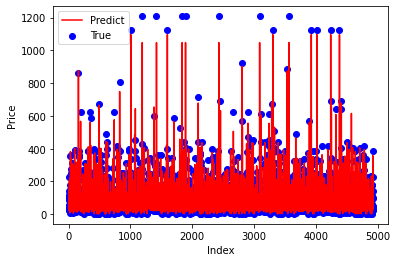

In [22]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(y_pred))], y_pred, color = 'r')
plt.scatter([i for i in range(len(y_pred))], y_test, color = 'b')
plt.ylabel('Price')
plt.xlabel('Index')
plt.legend(['Predict', 'True'], loc = 'best')
plt.show()